In [4]:
# Install required libraries
import os
import subprocess

# Function to install a package if not already installed
def install(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call(["pip", "install", package])

# Install required packages
for package in ["seaborn", "scikit-learn", "numpy"]:
    install(package)

# Your script
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Example: Creating dummy data for linear regression
X, y = np.arange(10).reshape(-1, 1), np.arange(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 1.0


In [5]:
# Importing Necessary Libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [10]:
# Install required library
import subprocess

try:
    import pandas as pd
except ImportError:
    subprocess.check_call(["pip", "install", "pandas", "openpyxl"])
    import pandas as pd

# Reading an Excel file
file_path = "C:/Users/singh/Desktop/project/Walmart Sales Predition Project/Sales Data.xlsx"  
try:
    data = pd.read_excel(file_path, engine='openpyxl')  # Ensure openpyxl is used
    print(data.head())  # Display the first few rows of the Excel file
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


   Store                 Date  Weekly_Sales  Holiday_Flag  Temperature  \
0      1  2010-05-02 00:00:00    1643690.90             0        42.31   
1      1  2010-12-02 00:00:00    1641957.44             1        38.51   
2      1           19-02-2010    1611968.17             0        39.93   
3      1           26-02-2010    1409727.59             0        46.63   
4      1  2010-05-03 00:00:00    1554806.68             0        46.50   

   Fuel_Price         CPI  Unemployment  
0       2.572  211.096358         8.106  
1       2.548  211.242170         8.106  
2       2.514  211.289143         8.106  
3       2.561  211.319643         8.106  
4       2.625  211.350143         8.106  


In [11]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02 00:00:00,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02 00:00:00,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03 00:00:00,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10 00:00:00,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10 00:00:00,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [12]:
# Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
# Checking for Missing Values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [14]:
# Handling the Date Column
data["Date_dt"] = data["Date"]

In [15]:
data["Date_dt"] = pd.to_datetime(data["Date_dt"], format = "%d-%m-%Y")

In [16]:
dates = data["Date_dt"].unique()
dates = np.sort(dates)

In [17]:
date_dict = dict()

In [18]:
for i,v in enumerate(dates):
    date_dict[v] = i+1

In [19]:
# We will use Linear Regression instead of a Time Series model to predict the Weekly Sales. Therefore, we are associating each week with a numerical value.
data["Week Number"] = data["Date_dt"].map(date_dict)

In [20]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_dt,Week Number
0,1,2010-05-02 00:00:00,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,14
1,1,2010-12-02 00:00:00,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,43
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,4
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,5
4,1,2010-05-03 00:00:00,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,15
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,137
6431,45,2012-05-10 00:00:00,733455.07,0,64.89,3.985,192.170412,8.667,2012-05-10,117
6432,45,2012-12-10 00:00:00,734464.36,0,54.47,4.000,192.327265,8.667,2012-12-10,143
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,140


In [21]:
# These columns are no longer needed since we have already associated the Weekly Sales with a number.
data.drop(["Date", "Date_dt"], axis = 1, inplace = True)

In [22]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week Number
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,14
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,43
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,5
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,15
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,137
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,117
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,143
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,140


In [23]:
# Extracting the Input Features
features = list(data.columns)
features.remove("Weekly_Sales")

# Input Data
X = data[features]

# Output Data
Y = data["Weekly_Sales"]

# Train-Test Split -- We will conceal the test data during model training, and when evaluating, we will use only the test data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.27)

# Training the Model
model = LinearRegression()
model.fit(X_Train, Y_Train)

# Predicting the Weekly Sales using the Test Data
Y_Pred = model.predict(X_Test)


In [24]:
# Calculating the percentage of variance in Weekly_Sales explained by the input features.
r2_score(Y_Test, Y_Pred)


0.14665972440667985

We are obtaining an accuracy of only 13%. That means only 13% of the variance in the data is being explained by the input features. However, we might be overlooking something. Take a look at the Store Column. It is a numerical column associated with each store. But is it the case that the store with the highest number is the best-performing store, and the one with the lowest number is the least performing? No, not at all. It's just a label assigned to each store. Essentially, it is a categorical feature, and we need to handle it.

In [25]:
df1 = pd.DataFrame({"True" : Y_Test/1000, "Predicted" : Y_Pred/1000})
df1

,True,Predicted
4291,1543.94723,916.811626
3114,992.77440,1142.057581
2007,604.17359,1270.981177
1834,2080.76417,1336.069709
3198,1159.43853,1235.262918
...,...,...
2692,1442.87322,1177.678198
860,506.76054,1253.095941
459,1935.85758,1455.228000
5940,479.25680,833.906061


<Axes: xlabel='True', ylabel='Predicted'>

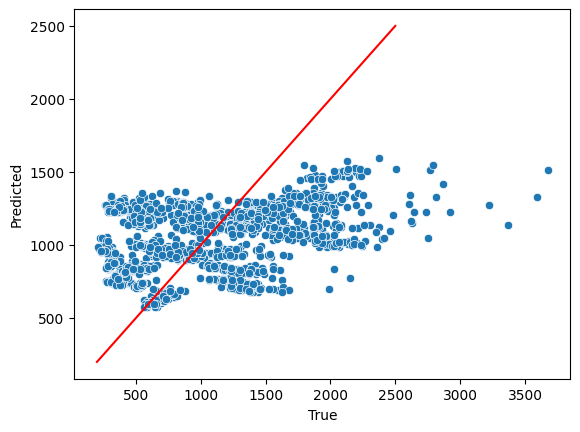

In [26]:
sns.scatterplot(data= df1, x = "True", y = "Predicted")
sns.lineplot(x = [200, 2500], y = [200, 2500], color = "red")


The red line represents what our model should have predicted, and the scatter points represent what has actually been predicted.

In [27]:
# Handling the Categorical Feature
data["Store"] = data["Store"].astype(str)

In [28]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week Number
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,14
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,43
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,5
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,15
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,137
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,117
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,143
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,140


In [29]:
final_data = pd.get_dummies(data, columns=["Store"], drop_first=True)

In [30]:
final_data.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week Number', 'Store_10', 'Store_11', 'Store_12',
       'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18',
       'Store_19', 'Store_2', 'Store_20', 'Store_21', 'Store_22', 'Store_23',
       'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29',
       'Store_3', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34',
       'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_4',
       'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45',
       'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9'],
      dtype='object')

In [31]:
data['Store'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  6435 non-null   float64
 1   Holiday_Flag  6435 non-null   int64  
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   Week Number   6435 non-null   int64  
 7   Store_10      6435 non-null   bool   
 8   Store_11      6435 non-null   bool   
 9   Store_12      6435 non-null   bool   
 10  Store_13      6435 non-null   bool   
 11  Store_14      6435 non-null   bool   
 12  Store_15      6435 non-null   bool   
 13  Store_16      6435 non-null   bool   
 14  Store_17      6435 non-null   bool   
 15  Store_18      6435 non-null   bool   
 16  Store_19      6435 non-null   bool   
 17  Store_2       6435 non-null   bool   
 18  Store_20      6435 non-null 

In [33]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week Number
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,14
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,43
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,5
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,15
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,137
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,117
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,143
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,140


In [34]:

# Extracting the Input Features
features = list(final_data.columns)
features.remove("Weekly_Sales")

# Input Data
X = final_data[features]

# Output Data
Y = final_data["Weekly_Sales"]

# Train-Test Split -- We will conceal the test data during model training, and when evaluating, we will use only the test data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.27)

# Training the Model
model.fit(X_Train, Y_Train)

# Predicting the Weekly Sales using the Test Data
Y_Pred = model.predict(X_Test)

In [35]:
r2_score(Y_Test, Y_Pred) 

0.9264928571694995

Therefore, just by handling the categorical feature, we improved our accuracy from 13% to 93%

In [36]:
df2 = pd.DataFrame({"True" : Y_Test/1000, "Predicted" : Y_Pred/1000})
df2

,True,Predicted
1635,990.95177,1000.040030
640,297.14969,278.558454
1854,1927.66411,2011.080318
6385,773.60377,789.203985
1124,916.91870,912.027483
...,...,...
4888,1180.18339,927.159322
1065,855.01477,885.604305
4241,452.16393,549.852938
751,1344.58092,1559.422537


<Axes: xlabel='True', ylabel='Predicted'>

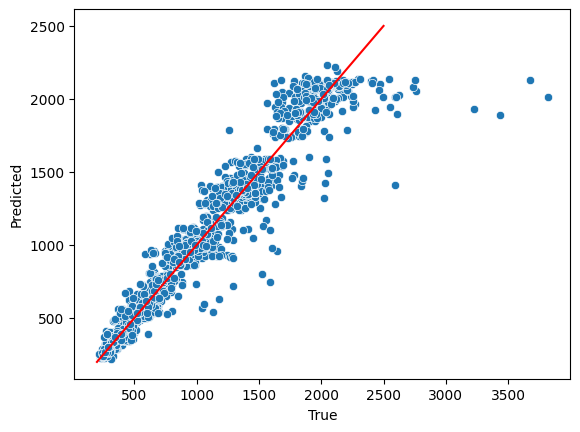

In [37]:
sns.scatterplot(data= df2, x = "True", y = "Predicted")
sns.lineplot(x = [200, 2500], y = [200, 2500], color = "red")


The red line represents what our model should have predicted, and the scatter points represent what has actually been predicted.